<a href="https://colab.research.google.com/github/mkumar312/Agentic-AI-Generative-AI-ML-DA-FSDC_CODES_EXPERTISE/blob/main/Copy_of_Fruit_Classification_TensorFlow_Model_for_Android_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Wed Feb 11 09:55:31 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2026-02-11 10:02:08--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 13.200.41.136, 13.200.41.134, 13.200.41.135, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.136|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2026-02-11 10:02:08 ERROR 404: Not Found.



Even though when you paste the link in a browser it downloads, wget cannot access that Bitbucket raw link anymore.

This is due to Bitbucket blocking or changing raw-file access for command-line tools.

✅ CORRECT & WORKING SOLUTION (Use Google Drive upload)
✅ Step 1 — Download manually

Open link in browser and download:
✅ Step 2 — Upload to Colab

In Colab:

Left panel ➜ Files ➜ Upload ➜ Select fruits.zip

After upload you will see:
Step 3 — Unzip

!unzip /fruits.zip\\

Why browser download works but wget fails?

Browser sends authentication headers

Bitbucket blocks anonymous raw file fetch

wget does not pass those headers

So command-line tools receive 404.

In [ ]:
!pwd


/content


In [ ]:
!unzip /fruits.zip


Archive:  /fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflati

In [ ]:
!ls


drive  fruits  __MACOSX  sample_data


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.19.0'

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)


Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


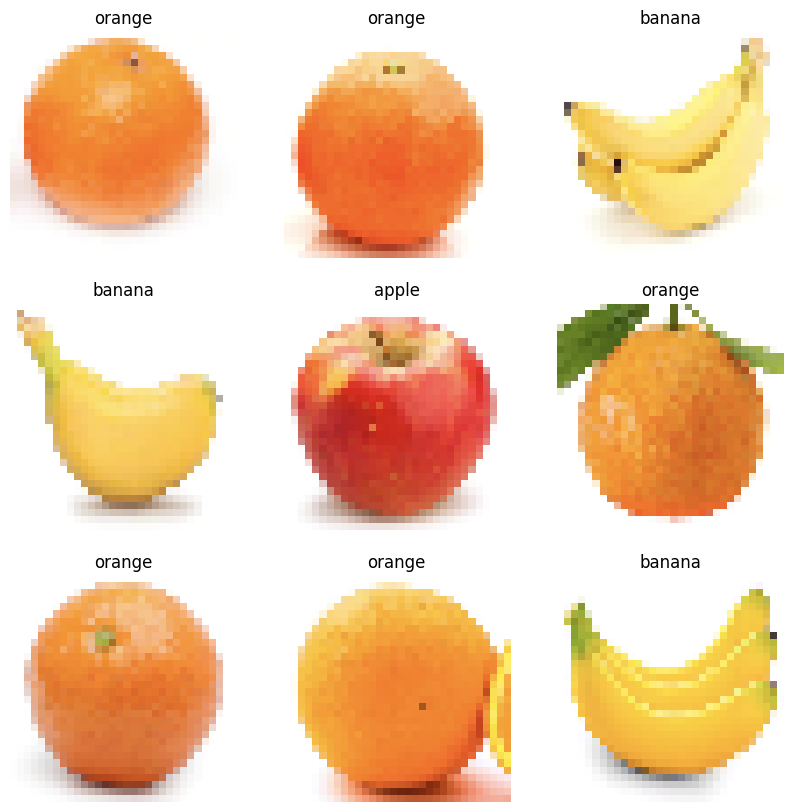

In [ ]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
[
    tf.keras.layers.Rescaling(1./255),  # each image property is different, so we make them proper array,
    tf.keras.layers.Conv2D(32, 3, activation="relu"),  # by putting them into pixel range which is from zero to 255
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="softmax"), # multiclass classification , so softmax
    tf.keras.layers.Dense(3)
]
)


In [ ]:
model.compile(
    optimizer="rmsprop",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)


In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.3420 - loss: 1.0986 - val_accuracy: 0.5152 - val_loss: 1.0966
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.3664 - loss: 1.0946 - val_accuracy: 0.4848 - val_loss: 1.0648
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.5047 - loss: 1.0602 - val_accuracy: 0.5606 - val_loss: 1.0162
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5942 - loss: 1.0058 - val_accuracy: 0.6061 - val_loss: 0.9731
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.5616 - loss: 0.9821 - val_accuracy: 0.4697 - val_loss: 1.0203
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.5712 - loss: 0.9808 - val_accuracy: 0.6212 - val_loss: 0.9180
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.6301 - loss: 0.9392 - val_accuracy: 0.6515 - val_loss: 0.9039
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7525 - loss: 0.9222 - val_accuracy: 0.8636

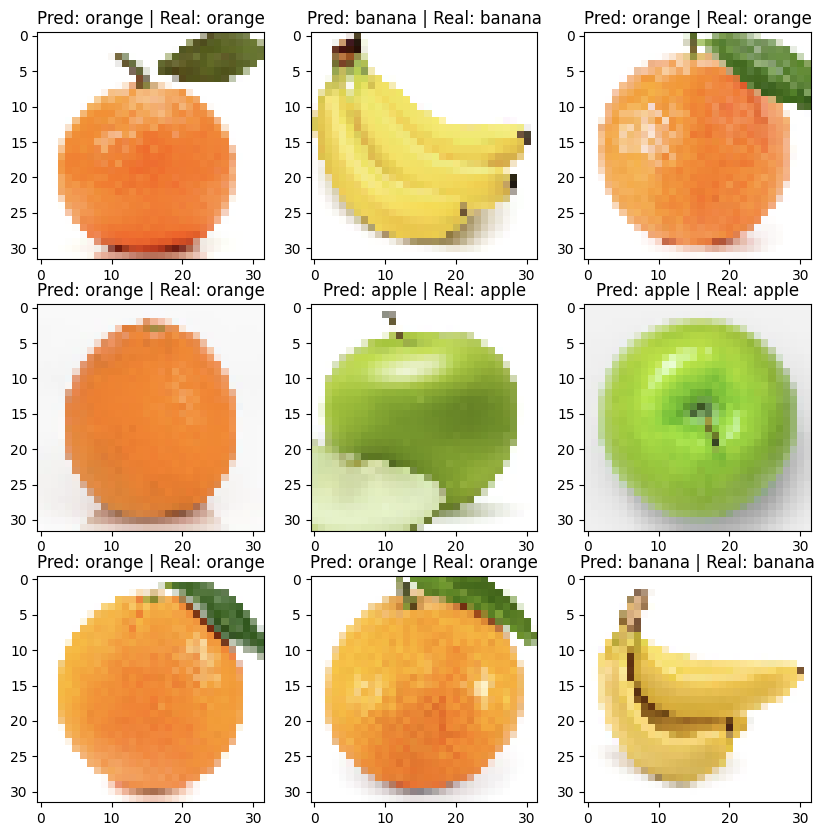

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
    f.write(tflite_model)

# this file will be given to frontend guys , so thats why it is important


Saved artifact at '/tmp/tmphfltj1nd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  136544980844368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136544980843408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136544980842832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136544934497168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136544934496784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136544934497744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136544934496592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136547652889360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136544934498128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136544934499664: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
!ls


drive  fruits  __MACOSX  model.tflite  sample_data


In [ ]:
!cp model.tflite /content/drive/MyDrive/


In [ ]:
!pwd


/content


✔ Importing model.tflite into Android Studio